In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Python\K-Means Clustering\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
X = df.values[:,[3,4]]

#subsetting 3rd and 4th index and storing into X

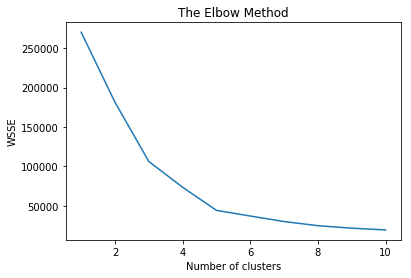

In [10]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wsse = []

for i in range(1,11):             #range 1 to 10
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)

plt.plot(range(1,11),wsse)     #line plot (x,y), range(1,11) = x parameter , wsse = y parameter
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [ ]:
#optimal value for k is 5 as the graph is gradually decreasing from point '5'

In [12]:
#Fitting K-Means to the dataset

kmeans = KMeans(n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(X)

#no training and testing here, predict on the entire data

In [13]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

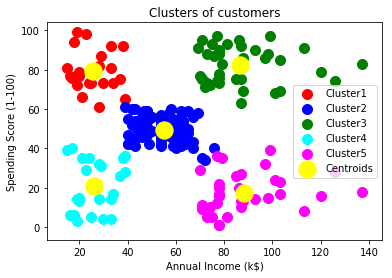

In [14]:
# Visualising the clusters
#plt.scatter(X,Y)
#X==>0th col(Annual Income)
#Y==>1st col(Spending Score)
#X[Y_pred == 0, 0]==>X[all obs which have been assigned to cluster 0,Annual income variable]
#X[Y_pred == 2, 1]==>X[all obs which have been assigned to cluster 2,Spending score variable]
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[Y_pred == 4, 0], X[Y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

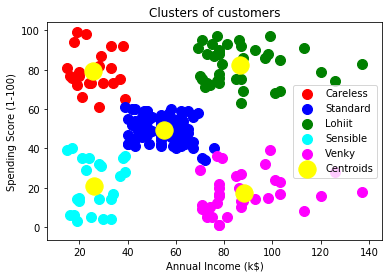

In [15]:
# Visualising the clusters
#plt.scatter(X,Y)
#X==>0th col(Annual Income)
#Y==>1st col(Spending Score)
#X[Y_pred == 0, 0]==>X[all obs which have been assigned to cluster 0,Annual income variable]
#X[Y_pred == 2, 1]==>X[all obs which have been assigned to cluster 2,Spending score variable]
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'green', label = 'Lohiit')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s = 100, c = 'cyan', label = 'Sensible')
plt.scatter(X[Y_pred == 4, 0], X[Y_pred == 4, 1], s = 100, c = 'magenta', label = 'Venky')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
df["Cluster"]=df.Cluster.map({0:'Careless',1:'Standard',2:'Target',3:'Sensible',4:'Careful'})

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Sensible
1,2,Male,21,15,81,Careless
2,3,Female,20,16,6,Sensible
3,4,Female,23,16,77,Careless
4,5,Female,31,17,40,Sensible
